In [11]:
import torch
import torch.nn as nn
import torchvision.datasets as dts
import torchvision.transforms as transforms

mnist_train = dts.MNIST(root = "MNIST_data/", train=True,  transform=transforms.ToTensor(),download=True)
mnist_test = dts.MNIST(root = "MNIST_data/", train=False,  transform=transforms.ToTensor(),download=True)

In [16]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=100,
                                          shuffle=True,
                                          drop_last=True)

In [30]:
for X,Y in data_loader:
    X = X.view(-1,28*28)
  

torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size

torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size

In [24]:
print(type(data_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [25]:
linear = nn.Linear(28*28,10)

In [29]:
optimizer = torch.optim.Adam(linear.parameters())

In [35]:
for epoch in range(15):
    total_cost = 0
    total_batch = len(data_loader)
    for X,Y in data_loader:
        X = X.view(-1, 28 * 28)
        cost = torch.nn.functional.cross_entropy(linear(X),Y)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        total_cost += cost / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(total_cost))

print('Learning finished')

Epoch: 0001 cost = 0.344201922
Epoch: 0002 cost = 0.308419436
Epoch: 0003 cost = 0.291321635
Epoch: 0004 cost = 0.281261086
Epoch: 0005 cost = 0.274126679
Epoch: 0006 cost = 0.268959314
Epoch: 0007 cost = 0.264951080
Epoch: 0008 cost = 0.261687696
Epoch: 0009 cost = 0.259101748
Epoch: 0010 cost = 0.256467253
Epoch: 0011 cost = 0.254517615
Epoch: 0012 cost = 0.252741396
Epoch: 0013 cost = 0.251109540
Epoch: 0014 cost = 0.249572873
Epoch: 0015 cost = 0.248422667
Learning finished


10000
Accuracy: 0.9049000144004822
Label:  3
tensor([[-1408.1399, -1984.8613,   361.7510,  1825.1210, -2335.6621, -1001.5436,
         -3063.6228, -1437.5803,  -963.7308,  -642.8596]])
tensor([3])
Prediction:  3


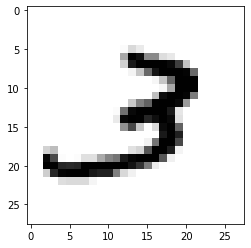

In [52]:
import random
import matplotlib.pyplot as plt 
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    print(len(correct_prediction))
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print(single_prediction)
    print(torch.argmax(single_prediction, dim=1))
    print('Prediction: ', torch.argmax(single_prediction, dim=1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    